<a href="https://colab.research.google.com/github/jose-luis15/final_programacion/blob/master/exportar_datos_en_folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [3]:
# 0. primero abrimos el archivo con pandas
data = pd.read_excel("IdentificacionEnElSueloEAD.xlsx")
data.head()

,Componente ambiental,Matriz,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Tipo de muestra,Parámetros que incumplen la norma,Norma de comparación,Descripcion de ubicación,Fecha,Aluminio total,Antinomio total,Arsénico total,Bario total,Berilio total,Bismuto total,Boro total,Cadmio total,Calcio total,Cerio total,Cobalto total,Cobre total,Cromo total,Estaño total,Estroncio total,Fosforo total,Hierro total,Litio total,Magnesio total,Manganeso total,Mercurio total,Molibdeno total,Níquel total,Plata total,Plomo total,Potasio total,Selenio total,Sodio disuelto,Talio total,Titanio total,Torio total,Uranio total,Vanadio total,Wolframio total,Zinc total
0,Suelo,Identificación de suelos,CSA-10a,300053,8313726,19 Sur,WGS84,4558,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,19685,"0,0067","4,9",317,"1,82","0,1892","3,2","0,0893",4773,"75,42",22,48,26,"0,46",100,1113,23764,"9,93",3084,1010,"0,08","0,632","18,5","0,276","13,1",1784,"3,65",731,"0,591",675,"9,236","1,983",52,"< 0,0017",117
1,Suelo,Identificación de suelos,CSA-10b,300014,8313687,19 Sur,WGS84,4525,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,11960,"< 0,0017","4,6",175,"1,8","0,1379","3,59","0,0675",6685,"69,66","12,8",32,21,"0,39",139,1672,25355,"5,85",3352,643,"< 0,03","0,725","16,3","< 0,006","7,67",1935,"3,45",375,"0,4714",265,"6,848","1,302",50,"< 0,0017","54,4"
2,Suelo,Identificación de suelos,CSA-10c,299982,8313619,19 Sur,WGS84,4498,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,16045,"< 0,0017","3,3",111,"1,28","0,127","0,282","0,0596",13833,"65,59","10,3",28,23,"0,65",108,1019,20127,"4,24",7042,618,"< 0,03","0,399",14,"< 0,006","10,5",1289,"4,37",583,"0,0651",200,"6,429","0,9039",53,"< 0,0017","57,7"
3,Suelo,Identificación de suelos,CSA-10d,299803,8313601,19 Sur,WGS84,4453,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,15293,"0,0051",4,246,"1,49","0,1302","2,59","0,0613",3662,"61,69","9,84",26,20,"0,35","89,3",1034,23156,"6,72",2831,688,"< 0,03","0,615","14,6","< 0,006","8,81",2402,"2,59",276,"0,3763",499,"7,538","1,65",42,"< 0,0017","41,9"
4,Suelo,Identificación de suelos,CSA-11a,300107,8312020,19 Sur,WGS84,4458,Simple,As,ECA suelo 2013,Ubicada al sur del tajo Valle y del botadero N...,8/02/2017,11477,"0,236",57,291,"1,22","0,4346","3,43","0,1865",3137,"48,44","7,98",31,13,"0,35","78,9",1125,22694,"6,59",2578,448,"< 0,03","2,07","9,6","< 0,006","35,1",1461,"3,22",262,"0,495",154,"3,175","1,658",36,"< 0,0017","63,8"


In [15]:
#1. importamos 3 librerias, installamos fiona y geopandas si es que no lo tenemos.
!pip install fiona
!pip install geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [0]:
# 2. elaboramos una lista que contenga la geometria
geometry = [Point(xy) for xy in zip(data.Este, data.Norte)]

In [0]:
# 3. elegimos el sistema de coordenadas, como esta en 19s, le corresppondera(sistema de coordenadas utm):
crs = {"init":"epsg:32719"}

In [0]:
# 4.convertimos a geo data frame para poder plotearlo
geo_df = GeoDataFrame(data, geometry = geometry, crs=crs)

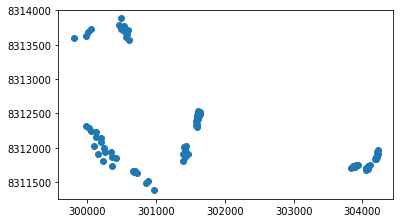

In [25]:
# plotemos
geo_df.plot()

In [0]:
# 5. lo pasamos a un sistema de coordenadas geografico y luego lo convertimos en json para poderimportarlo en la libreria folium
geojson = geo_df.to_crs(epsg="4326").to_json()

In [27]:
# 6. como ya es un geojson ahora podemos habrirlo con la libreria folium
import folium
mapa = folium.Map([-15.24,-70.85], zoom_start=12, tiles="Stamen Terrain") #condiciones del mapa
puntos = folium.features.GeoJson(geojson) #importamos los puntos(que estan en formato geojson)
mapa.add_children(puntos) #añadimos los puntos al mapa creado
mapa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.
